# Demo Monte Carlo Simulations

In this notebook, we demonstrate N>1 simulations being aggregated with our `MonteCarloProcessor`, and the corresponding metrics. For a more detailed look at a single simulation, refer to `demo_sim.ipynb.`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.sim import run_scenario
from src.sim.results import MonteCarloResults

pd.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

In [43]:
results.metadata["template"].coins

{TokenDTO(address='0x0000000000085d4780b73119b644ae5ecd22b376', name='TrueUSD', symbol='TUSD', decimals=18, min_trade_size=1000.0, max_trade_size=100000000.0),
 TokenDTO(address='0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0', name='Wrapped liquid staked Ether 2.0', symbol='wstETH', decimals=18, min_trade_size=0.5, max_trade_size=50000),
 TokenDTO(address='0x8e870d67f660d95d5be530380d0ec0bd388289e1', name='Pax Dollar', symbol='USDP', decimals=18, min_trade_size=1000.0, max_trade_size=100000000.0),
 TokenDTO(address='0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', name='USD Coin', symbol='USDC', decimals=6, min_trade_size=1000.0, max_trade_size=100000000.0),
 TokenDTO(address='0xdac17f958d2ee523a2206206994597c13d831ec7', name='Tether USD', symbol='USDT', decimals=6, min_trade_size=1000.0, max_trade_size=100000000.0)}

['0x0000000000085d4780b73119b644ae5ecd22b376',
 '0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0',
 '0x8e870d67f660d95d5be530380d0ec0bd388289e1',
 '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
 '0xdac17f958d2ee523a2206206994597c13d831ec7']

In [2]:
results: MonteCarloResults = run_scenario(
    "baseline", "wstETH", num_iter=10, ncpu=12
)  # change num CPU if needed

[INFO][16:11:48][src.sim]-48222: Running scenario: baseline


[INFO][16:11:48][src.sim.scenario]-48222: Fetching sim_market from subgraph.
[INFO][16:11:52][src.sim.scenario]-48222: Market snapshot as 2024-01-06 14:03:47
[INFO][16:11:52][src.sim.scenario]-48222: Bands snapshot as 2024-01-05 19:15:35
[INFO][16:11:52][src.sim.scenario]-48222: Users snapshot as 2024-01-06 15:06:47
[INFO][16:11:54][src.sim.scenario]-48222: Using 61599 1Inch quotes from 2023-12-15 16:11:52.162356 to 2023-12-22 16:11:52.162356
[INFO][16:11:54][src.utils.poolgraph]-48222: Found 20 valid trading cycles of length 3.
[INFO][16:11:54][src.sim.scenario]-48222: Equilibrated prices with 2 arbitrages with total profit 258
[INFO][16:11:54][src.sim.scenario]-48222: 2 users were loaded underwater.
[INFO][16:11:54][src.sim.scenario]-48222: Liquidating 0x9b92f68a18375d4f25ee159ef8c152168d882083: with debt 13265539817740666246116.
[INFO][16:11:54][src.sim.scenario]-48222: Liquidating 0x1df0096901d5bb51419ed2217fed7d17a5cb2fd7: with debt 77710221514220264126129.
[INFO][16:11:54][src.si

In [3]:
# results.summary.to_csv("results.csv")
results.data[0].df.tail()

,Bad Debt,System Health,Borrower Loss,Hard Liquidation Losses,Soft Liquidation Losses,Value Leakage,Keeper Profit,Keeper Count,Liquidator Profit,Liquidator Count,Arbitrageur Profit,Arbitrageur Count,Peg Strength,stableswap_crvUSD_TUSD Price,stableswap_crvUSD_USDP Price,stableswap_crvUSD_USDC Price,stableswap_crvUSD_USDT Price,Collateral Liquidated,Debt Repaid,Count,PK Debt,pk_crvUSD/TUSD Debt,pk_crvUSD/USDP Debt,pk_crvUSD/USDC Debt,pk_crvUSD/USDT Debt
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-13 16:12:04,0.0,0.602653,4974.576878,2393.367754,2581.209124,178597.211177,1199.786403,53,2308.49366,1,175088.931114,450,0.999839,1.001222,0.999517,0.999814,0.999856,12.538758,29950.007291,1,2.350866e+06,0.0,0.0,2.350866e+06,0.0
2024-01-13 17:12:04,0.0,0.602659,4974.576878,2393.367754,2581.209124,178732.026541,1199.786403,53,2308.49366,1,175223.746478,452,0.999825,1.001712,0.998961,0.999706,0.999980,12.538758,29950.007291,1,2.350866e+06,0.0,0.0,2.350866e+06,0.0
2024-01-13 18:12:04,0.0,0.598933,4974.576878,2393.367754,2581.209124,178997.038188,1199.786403,53,2308.49366,1,175488.758125,454,0.999771,1.003057,0.999537,0.999665,0.999901,12.538758,29950.007291,1,2.350866e+06,0.0,0.0,2.350866e+06,0.0
2024-01-13 19:12:04,0.0,0.601137,4974.576878,2393.367754,2581.209124,180963.026738,1199.786403,53,2308.49366,1,177454.746675,457,0.999955,0.999247,0.999537,0.999792,1.000148,12.538758,29950.007291,1,2.350866e+06,0.0,0.0,2.350866e+06,0.0
2024-01-13 20:12:04,0.0,0.601612,4974.576878,2393.367754,2581.209124,181171.700144,1199.786403,53,2308.49366,1,177663.420081,459,0.999929,0.999731,0.999537,0.999973,0.999871,12.538758,29950.007291,1,2.350866e+06,0.0,0.0,2.350866e+06,0.0


- All metrics create 1 or more cols in the dataframe
- For each of these cols, we define (a) a way to summarize the col, and (b) a way to plot the col. Notice that (a) could create new columns.
- The summarized versions get appended to the Monte Carlo processor. The Monte Carlo processor can (a) plot the summarized data (e.g. histograms), (b) plot the non-summarized data for all runs in a single plot (e.g. timeseries plots of bad debt), and (c) reduce the summarized data into scalars?

In [4]:
summary = results.summary
summary

,Bad Debt_max,Bad Debt_mean,System Health_mean,System Health_min,Borrower Loss_max,Hard Liquidation Losses_max,Soft Liquidation Losses_max,Value Leakage_max,Keeper Profit_max,Keeper Count_max,Liquidator Profit_max,Liquidator Count_max,Arbitrageur Profit_max,Arbitrageur Count_max,Peg Strength_max,Peg Strength_mean,Peg Strength_min,stableswap_crvUSD_TUSD Price_max,stableswap_crvUSD_TUSD Price_mean,stableswap_crvUSD_TUSD Price_min,stableswap_crvUSD_USDP Price_max,stableswap_crvUSD_USDP Price_mean,stableswap_crvUSD_USDP Price_min,stableswap_crvUSD_USDC Price_max,stableswap_crvUSD_USDC Price_mean,stableswap_crvUSD_USDC Price_min,stableswap_crvUSD_USDT Price_max,stableswap_crvUSD_USDT Price_mean,stableswap_crvUSD_USDT Price_min,Collateral Liquidated_max,Debt Repaid_max,Count_max,PK Debt_max,PK Debt_mean,pk_crvUSD/TUSD Debt_max,pk_crvUSD/TUSD Debt_mean,pk_crvUSD/USDP Debt_max,pk_crvUSD/USDP Debt_mean,pk_crvUSD/USDC Debt_max,pk_crvUSD/USDC Debt_mean,pk_crvUSD/USDT Debt_max,pk_crvUSD/USDT Debt_mean
0,0.0,0.0,0.551974,0.503798,4974.576878,2393.367754,2581.209124,181171.700144,1199.786403,53.0,2308.493660,1.0,177663.420081,459.0,1.000329,0.999887,0.999600,1.004818,1.000663,0.995883,1.001755,0.999527,0.996452,1.001228,1.000062,0.998974,1.001120,0.999621,0.998121,12.538758,29950.007291,1.0,3.905853e+06,2.676098e+06,1.391863e+06,2.793719e+05,163123.501019,10515.972664,2.350866e+06,2.350866e+06,7.525224e+05,35343.672979
1,0.0,0.0,0.534610,0.499544,56846.175165,52286.782771,4559.392393,268294.551048,2163.501253,114.0,51122.467544,3.0,215008.582252,486.0,1.000283,0.999962,0.999743,1.006519,1.000550,0.994799,1.002015,0.999855,0.997567,1.001246,1.000007,0.998773,1.001155,0.999856,0.998422,280.240653,665792.085271,3.0,4.582009e+06,2.932545e+06,1.292749e+06,3.591920e+05,303591.422589,52662.136569,2.350866e+06,2.350866e+06,1.889534e+06,169824.926341
2,0.0,0.0,0.524351,0.501536,58134.251421,52504.039848,5630.211573,229187.329155,2383.160540,97.0,51044.482577,3.0,175759.686038,487.0,1.000363,0.999919,0.999717,1.005813,1.001259,0.996001,1.002319,0.999909,0.997865,1.001005,0.999923,0.998691,1.001155,0.999822,0.998482,280.240653,665737.701223,3.0,4.838461e+06,3.315425e+06,1.442858e+06,7.929260e+05,400160.875639,60496.731162,2.350866e+06,2.350866e+06,1.387914e+06,111135.903390
3,0.0,0.0,0.536024,0.512553,2627.856044,0.000000,2627.856044,157622.305598,1272.006703,45.0,0.000000,0.0,156350.298894,429.0,1.000170,0.999891,0.999713,1.006383,1.000849,0.997334,1.002400,0.999964,0.997690,1.000934,0.999981,0.998937,1.001102,0.999676,0.998368,0.000000,0.000000,0.0,3.684841e+06,2.605045e+06,1.240122e+06,1.951735e+05,194808.445997,16798.230591,2.350866e+06,2.350866e+06,7.488865e+05,42206.890219
4,0.0,0.0,0.504502,0.473779,67875.573487,59127.887761,8747.685726,242562.825428,2499.096422,96.0,57485.470920,5.0,182578.258087,462.0,1.000274,0.999901,0.999584,1.005408,1.001009,0.997420,1.002327,0.999926,0.997971,1.001154,0.999930,0.998700,1.000910,0.999776,0.998484,314.281046,744974.830475,5.0,6.317939e+06,4.063601e+06,3.281117e+06,1.626965e+06,324148.173164,24449.086114,2.350866e+06,2.350866e+06,9.022913e+05,61320.270449
5,0.0,0.0,0.540672,0.502027,6473.071875,2331.265548,4141.806327,185146.742406,1086.061824,42.0,2315.003940,1.0,181745.676642,467.0,1.000433,0.999894,0.999665,1.005009,1.000634,0.996981,1.002008,0.999881,0.997461,1.001036,1.000009,0.998987,1.000773,0.999700,0.998003,12.538758,29949.612991,1.0,3.330469e+06,2.528271e+06,8.988144e+05,1.588488e+05,115914.531805,8408.830571,2.350866e+06,2.350866e+06,3.067509e+05,10147.348502
6,0.0,0.0,0.593231,0.512553,1521.297968,0.000000,1521.297968,155148.409978,1038.424691,37.0,0.000000,0.0,154109.985287,425.0,1.000238,0.999860,0.999672,1.004958,1.000963,0.997021,1.002103,0.999800,0.997417,1.001195,0.999960,0.998952,1.001107,0.999657,0.998416,0.000000,0.000000,0.0,3.830631e+06,2.573969e+06,1.247834e+06,2.102556e+05,231930.261728,10051.434349,2.350866e+06,2.350866e+06,2.348558e+05,2795.902702
7,0.0,0.0,0.542529,0.505069,4581.

In [27]:
cols = results.summary.columns
_df = results.summary[cols]
_df

,Bad Debt_max,Bad Debt_mean,System Health_mean,System Health_min,Borrower Loss_max,Hard Liquidation Losses_max,Soft Liquidation Losses_max,Value Leakage_max,Keeper Profit_max,Keeper Count_max,Liquidator Profit_max,Liquidator Count_max,Arbitrageur Profit_max,Arbitrageur Count_max,Peg Strength_max,Peg Strength_mean,Peg Strength_min,stableswap_crvUSD_TUSD Price_max,stableswap_crvUSD_TUSD Price_mean,stableswap_crvUSD_TUSD Price_min,stableswap_crvUSD_USDP Price_max,stableswap_crvUSD_USDP Price_mean,stableswap_crvUSD_USDP Price_min,stableswap_crvUSD_USDC Price_max,stableswap_crvUSD_USDC Price_mean,stableswap_crvUSD_USDC Price_min,stableswap_crvUSD_USDT Price_max,stableswap_crvUSD_USDT Price_mean,stableswap_crvUSD_USDT Price_min,Collateral Liquidated_max,Debt Repaid_max,Count_max,PK Debt_max,PK Debt_mean,pk_crvUSD/TUSD Debt_max,pk_crvUSD/TUSD Debt_mean,pk_crvUSD/USDP Debt_max,pk_crvUSD/USDP Debt_mean,pk_crvUSD/USDC Debt_max,pk_crvUSD/USDC Debt_mean,pk_crvUSD/USDT Debt_max,pk_crvUSD/USDT Debt_mean
0,0.0,0.0,0.551974,0.503798,4974.576878,2393.367754,2581.209124,181171.700144,1199.786403,53.0,2308.493660,1.0,177663.420081,459.0,1.000329,0.999887,0.999600,1.004818,1.000663,0.995883,1.001755,0.999527,0.996452,1.001228,1.000062,0.998974,1.001120,0.999621,0.998121,12.538758,29950.007291,1.0,3.905853e+06,2.676098e+06,1.391863e+06,2.793719e+05,163123.501019,10515.972664,2.350866e+06,2.350866e+06,7.525224e+05,35343.672979
1,0.0,0.0,0.534610,0.499544,56846.175165,52286.782771,4559.392393,268294.551048,2163.501253,114.0,51122.467544,3.0,215008.582252,486.0,1.000283,0.999962,0.999743,1.006519,1.000550,0.994799,1.002015,0.999855,0.997567,1.001246,1.000007,0.998773,1.001155,0.999856,0.998422,280.240653,665792.085271,3.0,4.582009e+06,2.932545e+06,1.292749e+06,3.591920e+05,303591.422589,52662.136569,2.350866e+06,2.350866e+06,1.889534e+06,169824.926341
2,0.0,0.0,0.524351,0.501536,58134.251421,52504.039848,5630.211573,229187.329155,2383.160540,97.0,51044.482577,3.0,175759.686038,487.0,1.000363,0.999919,0.999717,1.005813,1.001259,0.996001,1.002319,0.999909,0.997865,1.001005,0.999923,0.998691,1.001155,0.999822,0.998482,280.240653,665737.701223,3.0,4.838461e+06,3.315425e+06,1.442858e+06,7.929260e+05,400160.875639,60496.731162,2.350866e+06,2.350866e+06,1.387914e+06,111135.903390
3,0.0,0.0,0.536024,0.512553,2627.856044,0.000000,2627.856044,157622.305598,1272.006703,45.0,0.000000,0.0,156350.298894,429.0,1.000170,0.999891,0.999713,1.006383,1.000849,0.997334,1.002400,0.999964,0.997690,1.000934,0.999981,0.998937,1.001102,0.999676,0.998368,0.000000,0.000000,0.0,3.684841e+06,2.605045e+06,1.240122e+06,1.951735e+05,194808.445997,16798.230591,2.350866e+06,2.350866e+06,7.488865e+05,42206.890219
4,0.0,0.0,0.504502,0.473779,67875.573487,59127.887761,8747.685726,242562.825428,2499.096422,96.0,57485.470920,5.0,182578.258087,462.0,1.000274,0.999901,0.999584,1.005408,1.001009,0.997420,1.002327,0.999926,0.997971,1.001154,0.999930,0.998700,1.000910,0.999776,0.998484,314.281046,744974.830475,5.0,6.317939e+06,4.063601e+06,3.281117e+06,1.626965e+06,324148.173164,24449.086114,2.350866e+06,2.350866e+06,9.022913e+05,61320.270449
5,0.0,0.0,0.540672,0.502027,6473.071875,2331.265548,4141.806327,185146.742406,1086.061824,42.0,2315.003940,1.0,181745.676642,467.0,1.000433,0.999894,0.999665,1.005009,1.000634,0.996981,1.002008,0.999881,0.997461,1.001036,1.000009,0.998987,1.000773,0.999700,0.998003,12.538758,29949.612991,1.0,3.330469e+06,2.528271e+06,8.988144e+05,1.588488e+05,115914.531805,8408.830571,2.350866e+06,2.350866e+06,3.067509e+05,10147.348502
6,0.0,0.0,0.593231,0.512553,1521.297968,0.000000,1521.297968,155148.409978,1038.424691,37.0,0.000000,0.0,154109.985287,425.0,1.000238,0.999860,0.999672,1.004958,1.000963,0.997021,1.002103,0.999800,0.997417,1.001195,0.999960,0.998952,1.001107,0.999657,0.998416,0.000000,0.000000,0.0,3.830631e+06,2.573969e+06,1.247834e+06,2.102556e+05,231930.261728,10051.434349,2.350866e+06,2.350866e+06,2.348558e+05,2795.902702
7,0.0,0.0,0.542529,0.505069,4581.

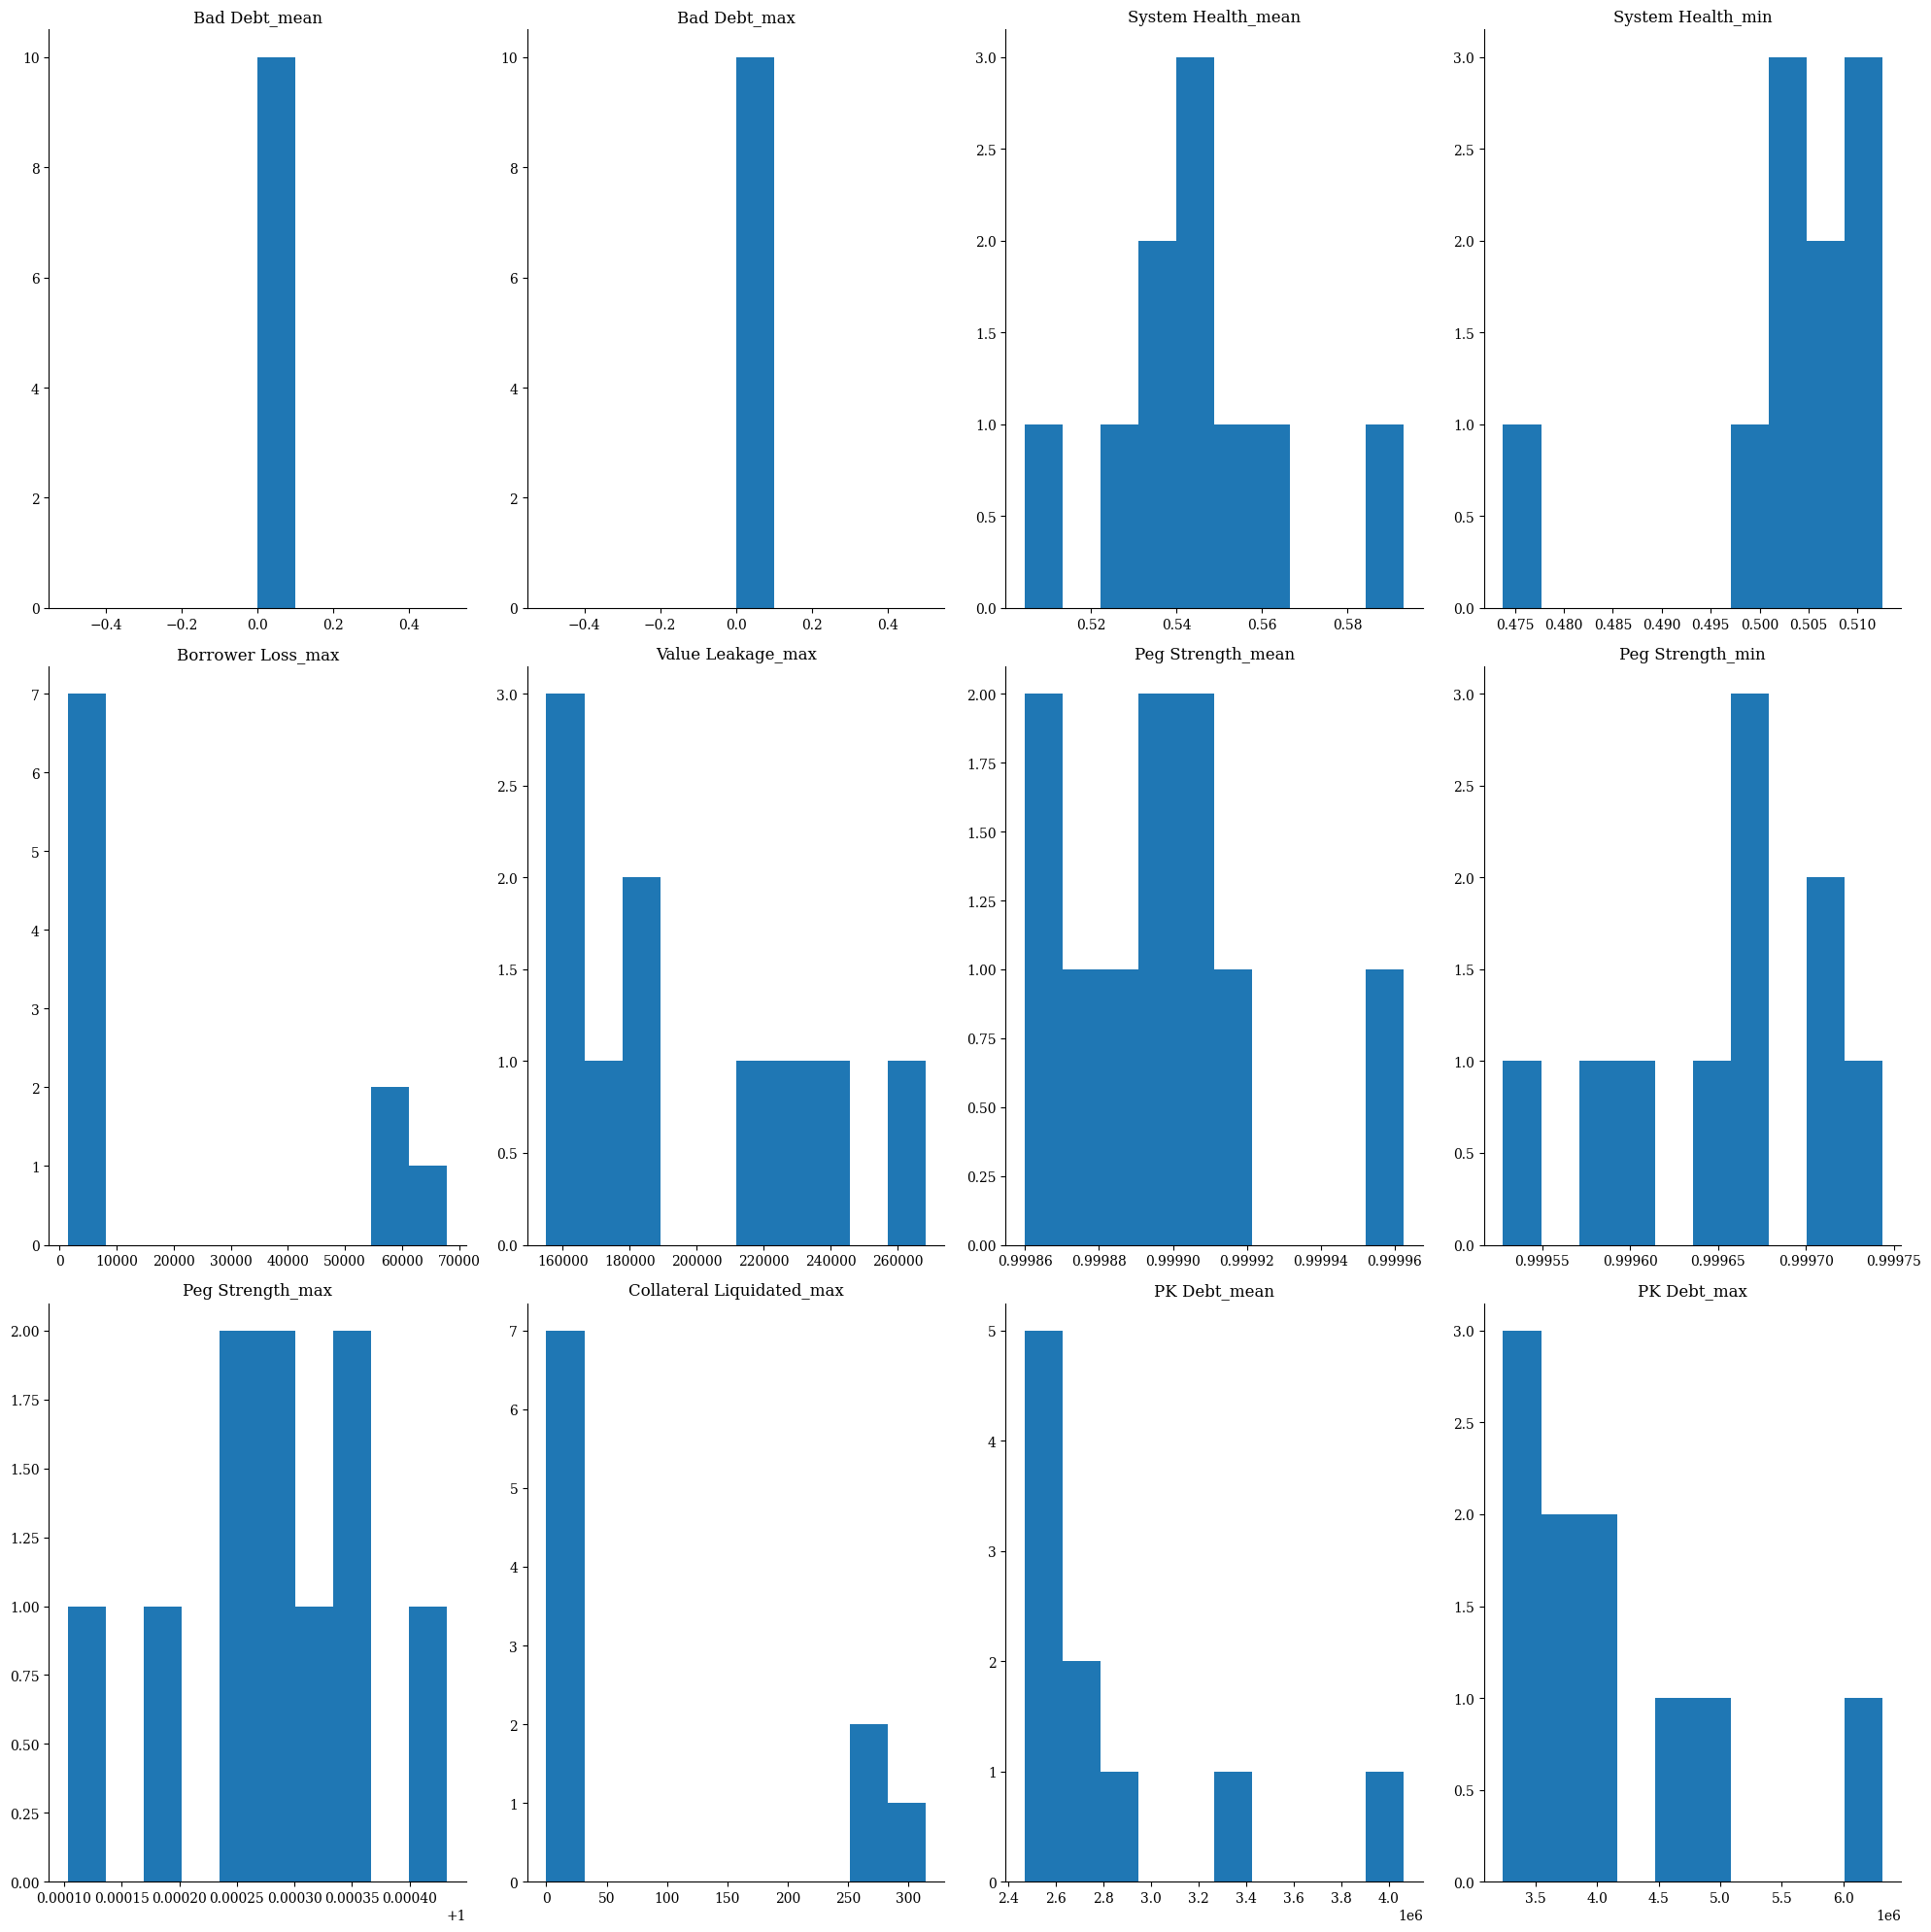

In [31]:
results.plot_summary()
# if text is too small, save plot and zoom in, or plot less metrics

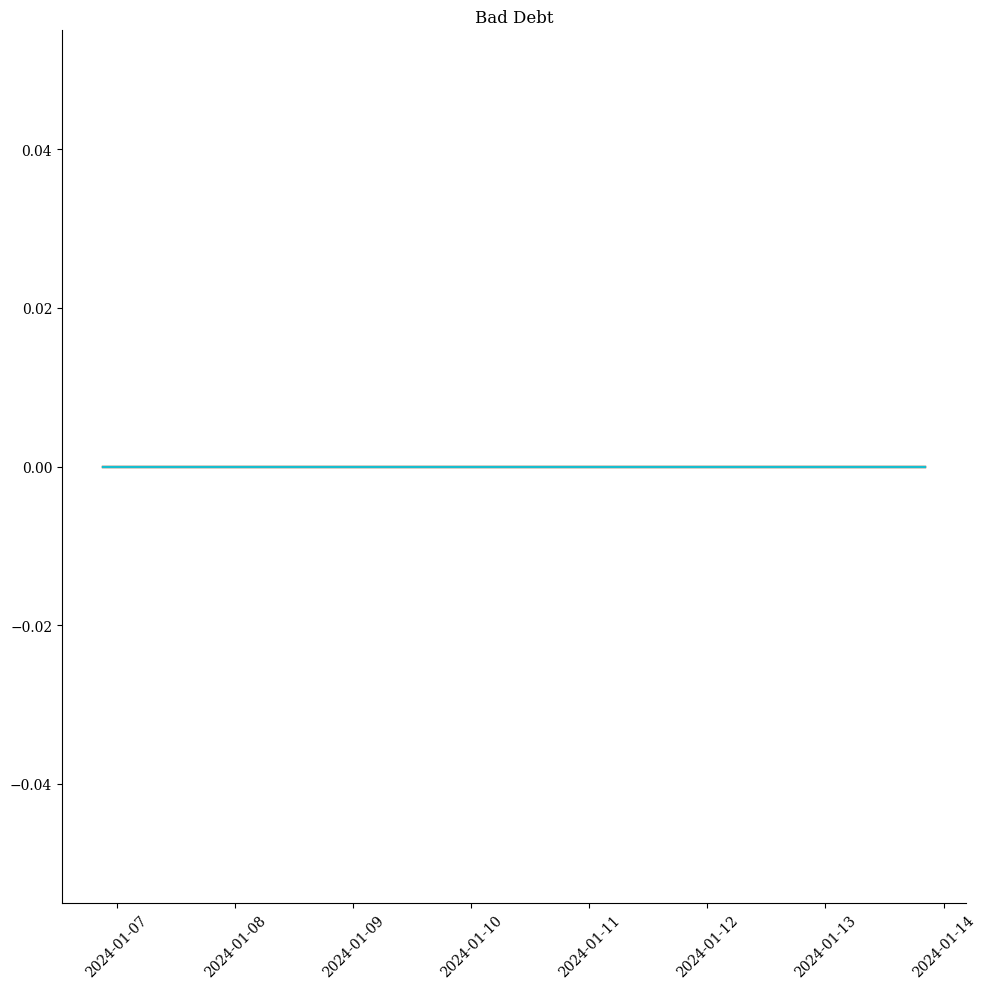

In [32]:
results.plot_runs(0)

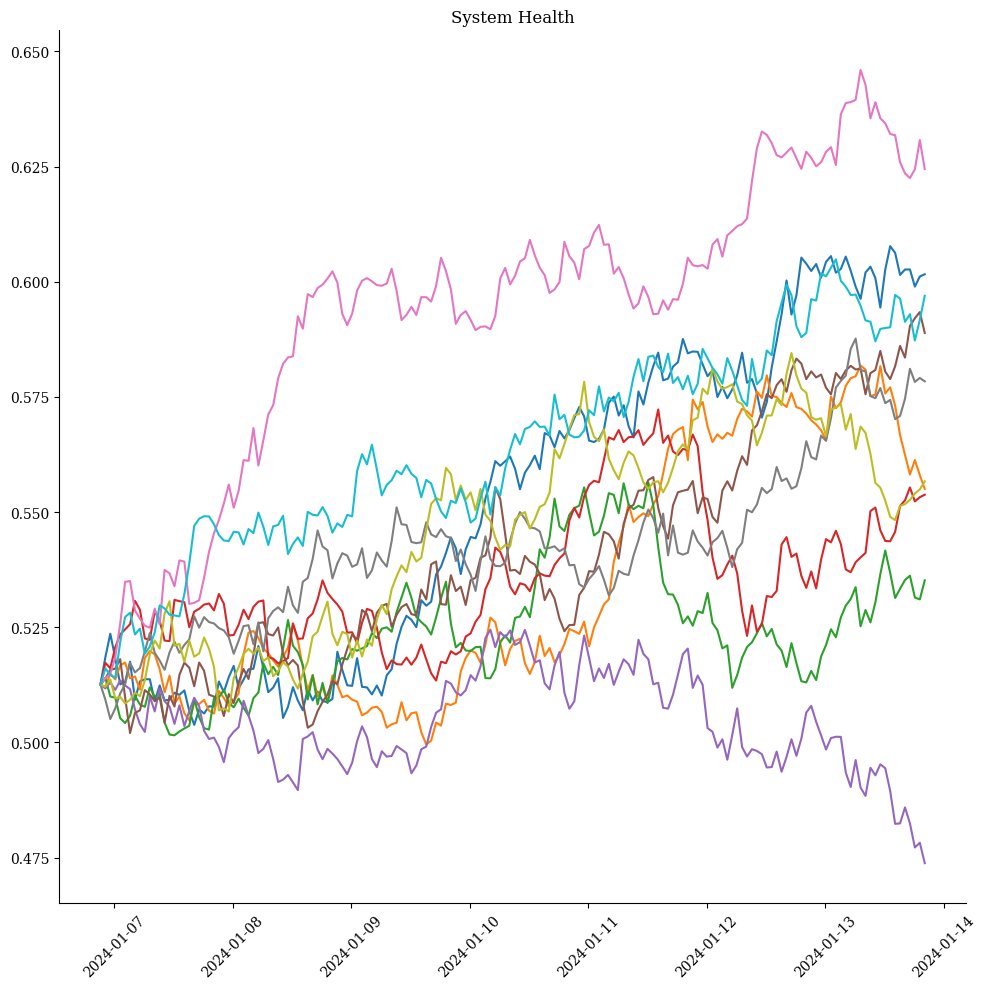

In [33]:
results.plot_runs(1)

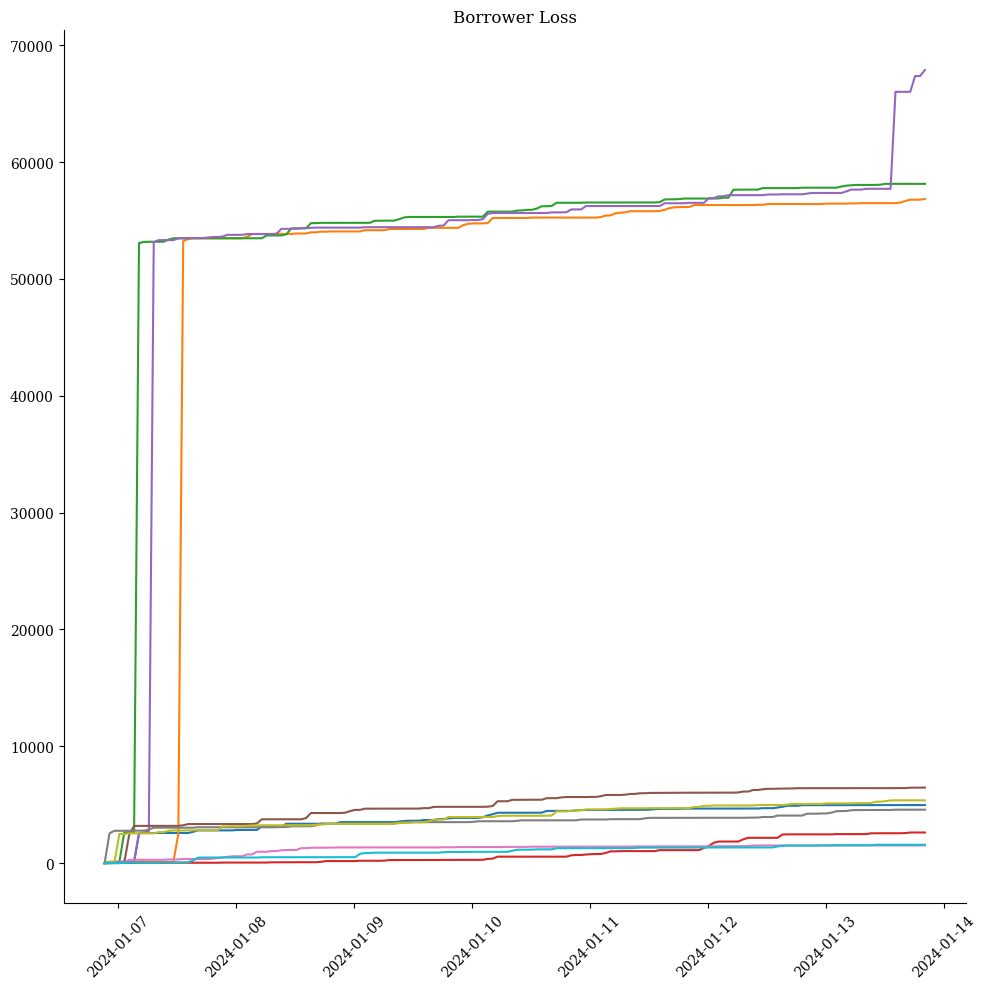

In [34]:
results.plot_runs(2)

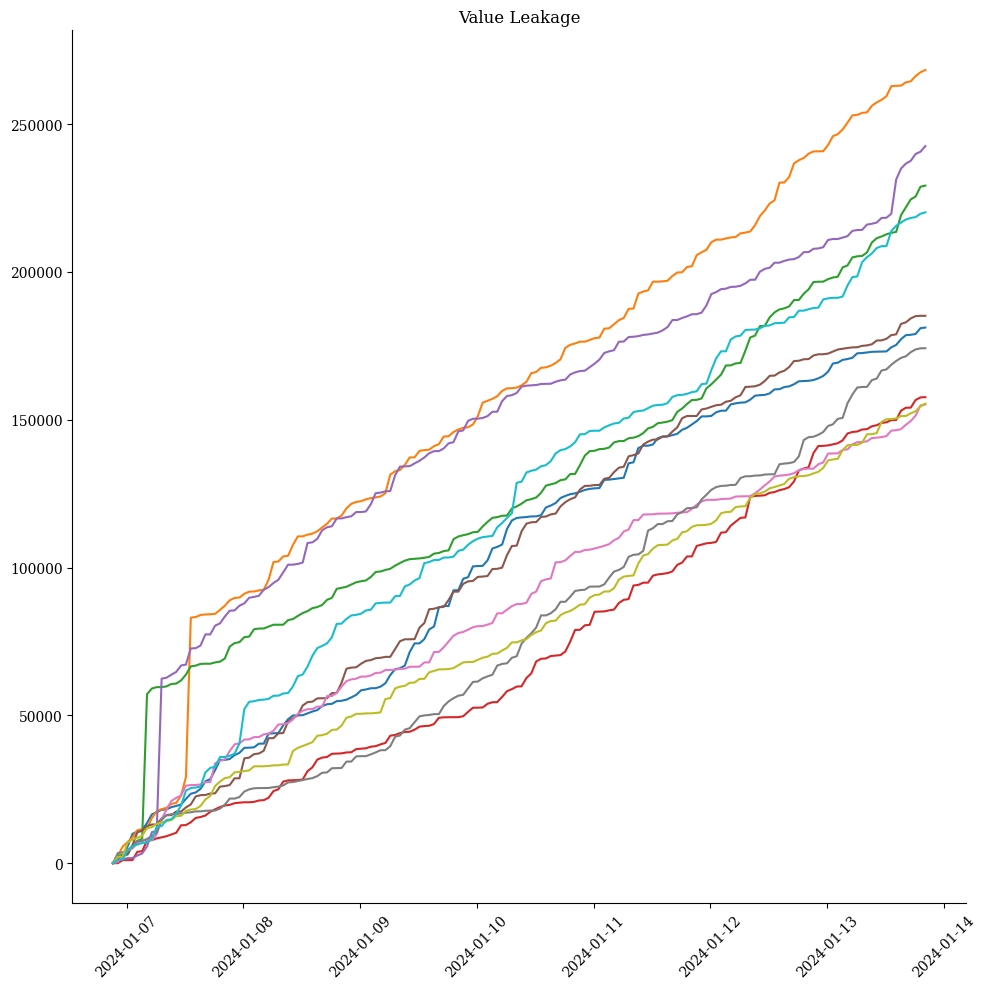

In [35]:
results.plot_runs(3)

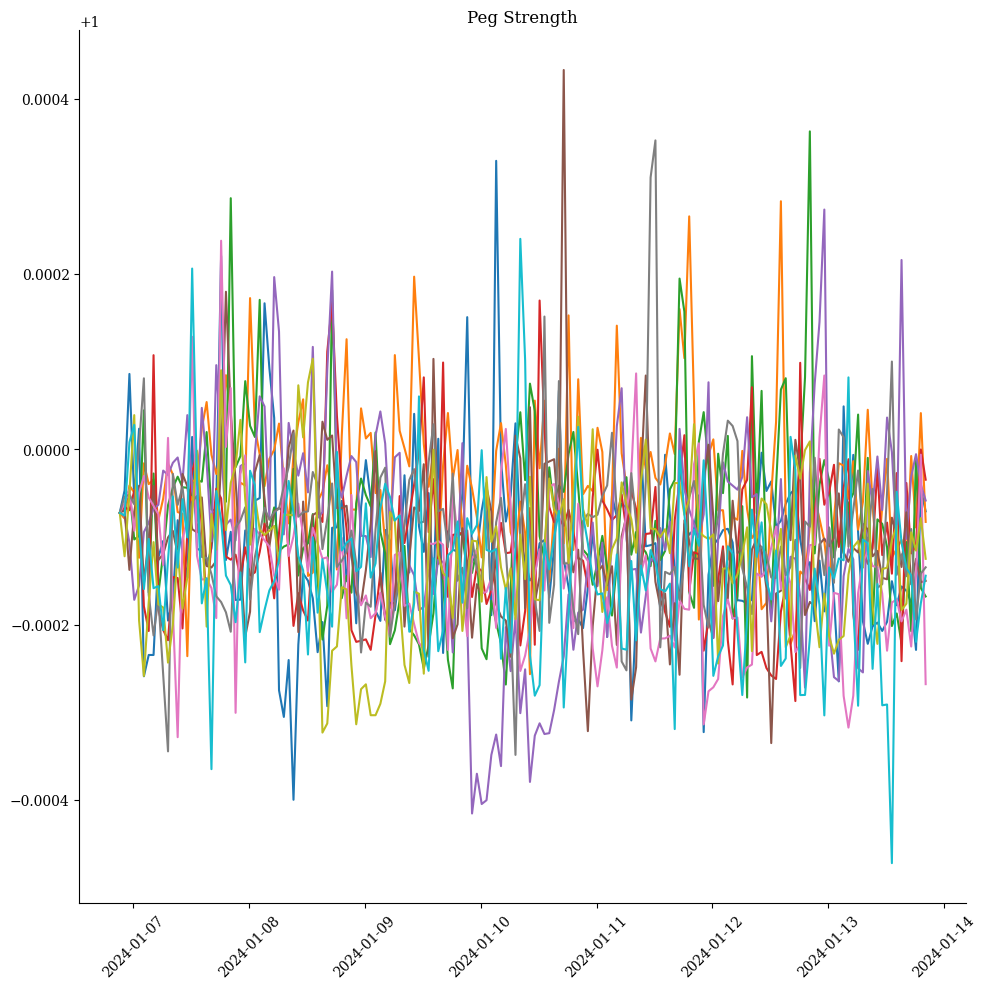

In [36]:
results.plot_runs(4)

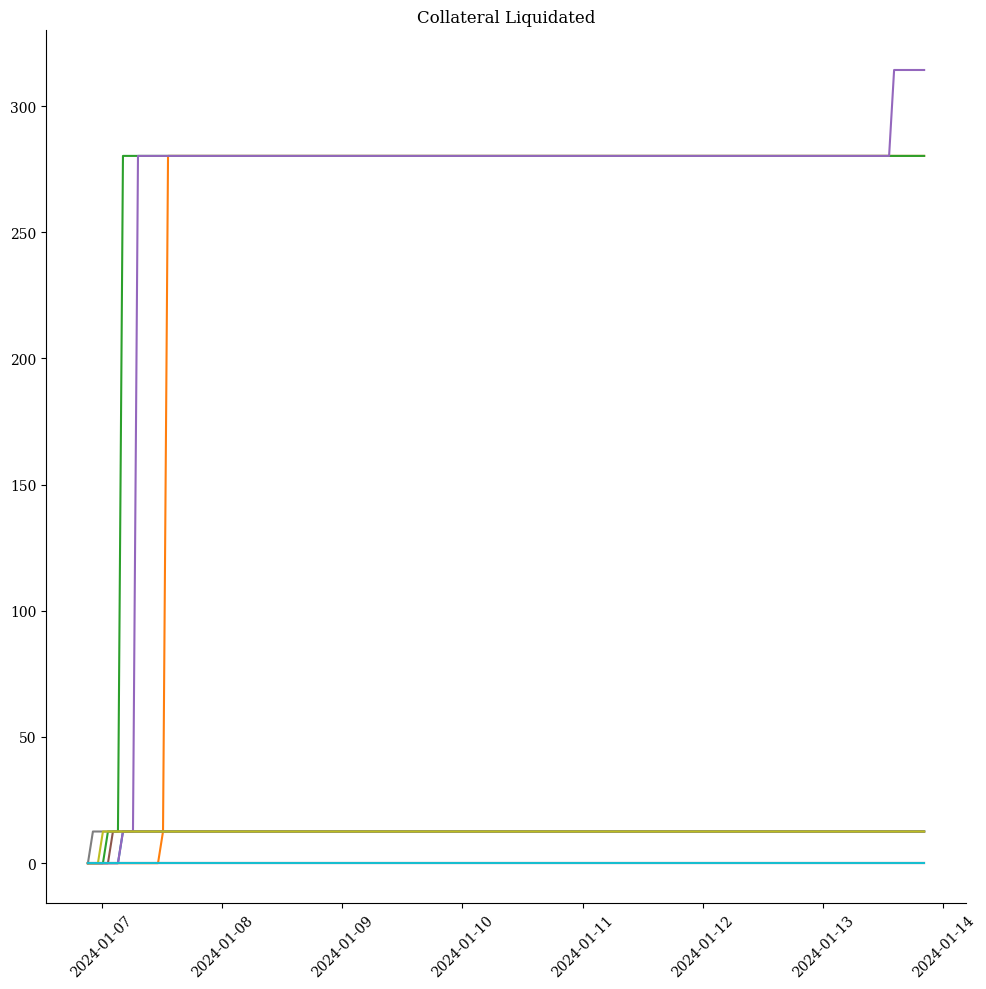

In [37]:
results.plot_runs(5)

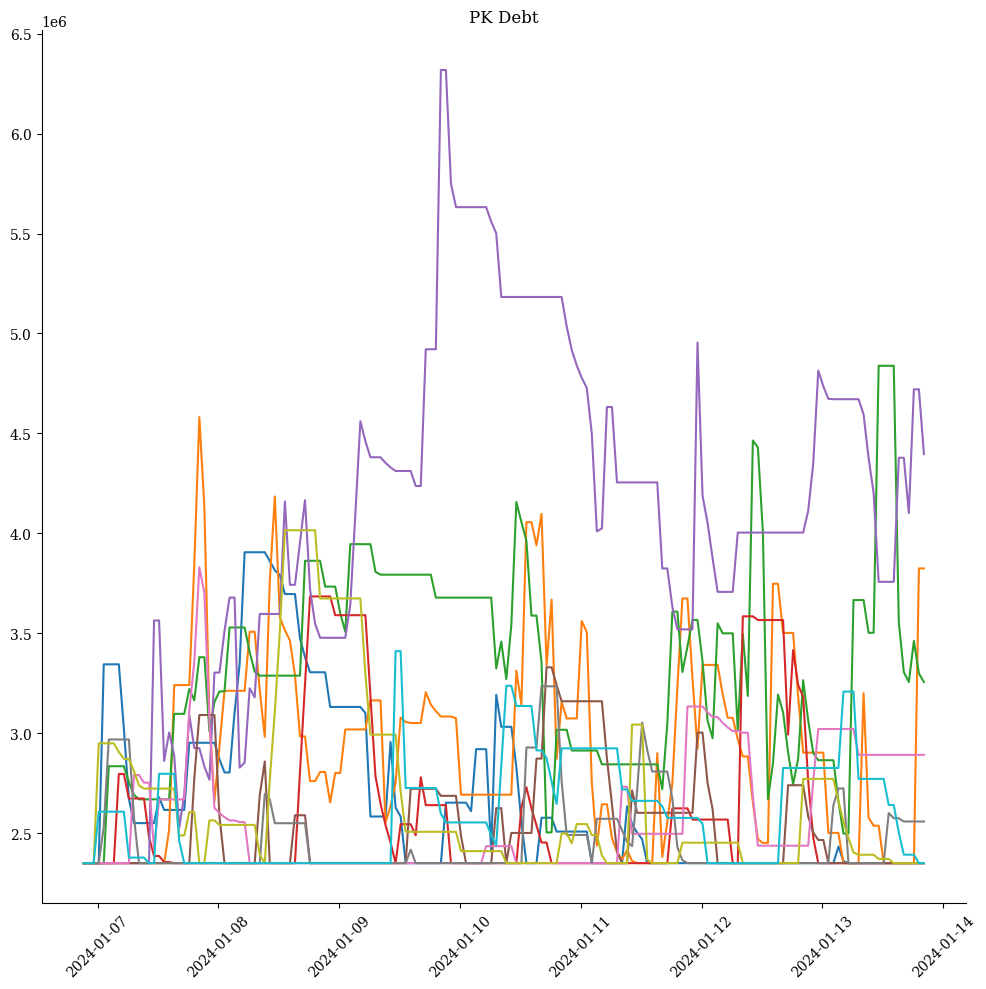

In [38]:
results.plot_runs(6)